In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [20]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [21]:
# Get a list of devices like GPUs and CPUs available to TF

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16979652028047129863
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 7316873944256250877
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 15788776905020658704
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11281553818
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5058924614347045685
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


<h3>MNIST DATASET</h3>

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.The database is also widely used for training and testing in the field of machine learning.It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. There have been a number of scientific papers on attempts to achieve the lowest error rate; one paper, using a hierarchical system of convolutional neural networks, manages to get an error rate on the MNIST database of 0.23%. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support vector machine to get an error rate of 0.8%. An extended dataset similar to MNIST called EMNIST has been published in 2017, which contains 240,000 training images, and 40,000 testing images of handwritten digits and characters.

In [0]:
#If keras is not using tensorflow as backend, set "KERAS_BACKEND=tensorflow"
from keras.utils import np_utils 
from keras.datasets import mnist
from keras import datasets
import seaborn as sns
from keras.initializers import RandomNormal
import warnings
warnings.filterwarnings("ignore")

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import time

#This function is used to plot/update the train and test loss after each epoch.
def plt_dynamic_loss(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

#This function is used to plot/update the train and test accuracy after each epoch.
def plt_dynamic_acc(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Test Accuracy")
    ax.plot(x, ty, 'r', label="Train Accuracy")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
#Load the MNIST dataset, shuffle and split the data into train and test set.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [25]:
#Print the dimensions of the train and test data.
print("Number of training samples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training samples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training samples : 60000 and each image is of shape (28, 28)
Number of training samples : 10000 and each image is of shape (28, 28)


In [0]:
#The input shape is a 3 dimensional vector. For each image we have a (28*28) vector. We will convert the (28*28) vector into single dimensional vector of 1 * 784. 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [27]:
#Dimensions of the train and test data after flattening each row.
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


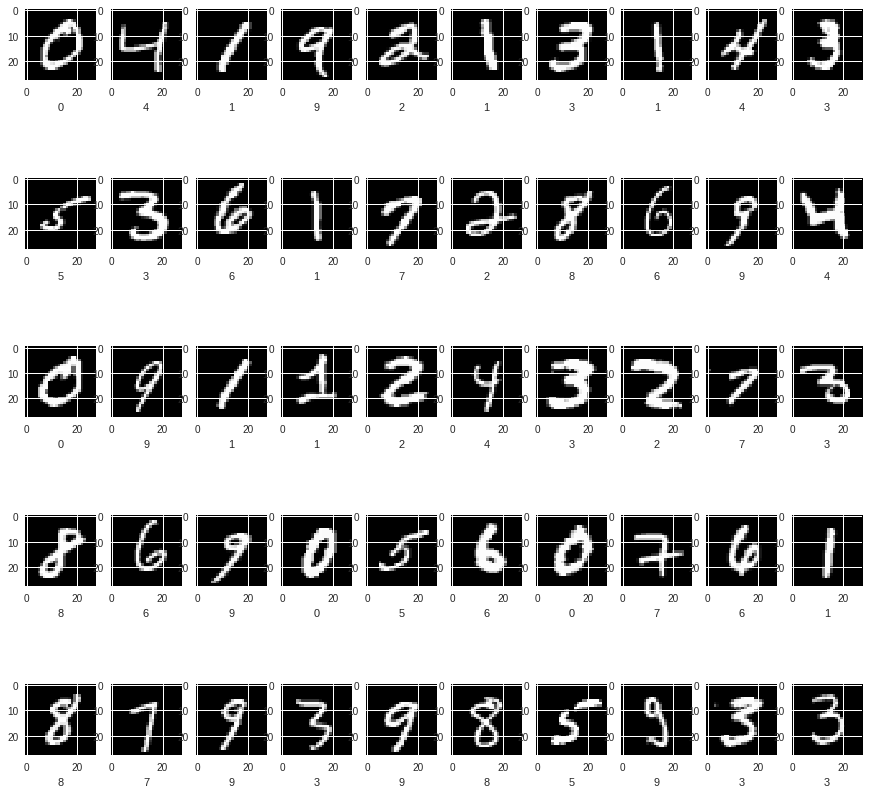

In [28]:
#Display or plot a number from the MNIST train dataset. Find the corresponding labels below the images.
plt.figure(figsize=(15,15))
for i in range(1,51):
    row = i
    grid_data = X_train[row].reshape(28,28) #Reshape from 1d to 2d pixel array
    plt.subplot(5,10,row)
    plt.imshow(grid_data, interpolation = "none", cmap = "gray")
    plt.xlabel(y_train[row],labelpad=5)
plt.show()

<h3>2D Visualization of the MNIST train dataset using PCA.</h3>

Shape of the Data Matrix before reducing dimension:  (60000, 784)
Shape of the Data Matrix after reducing dimension:  (60000, 2)


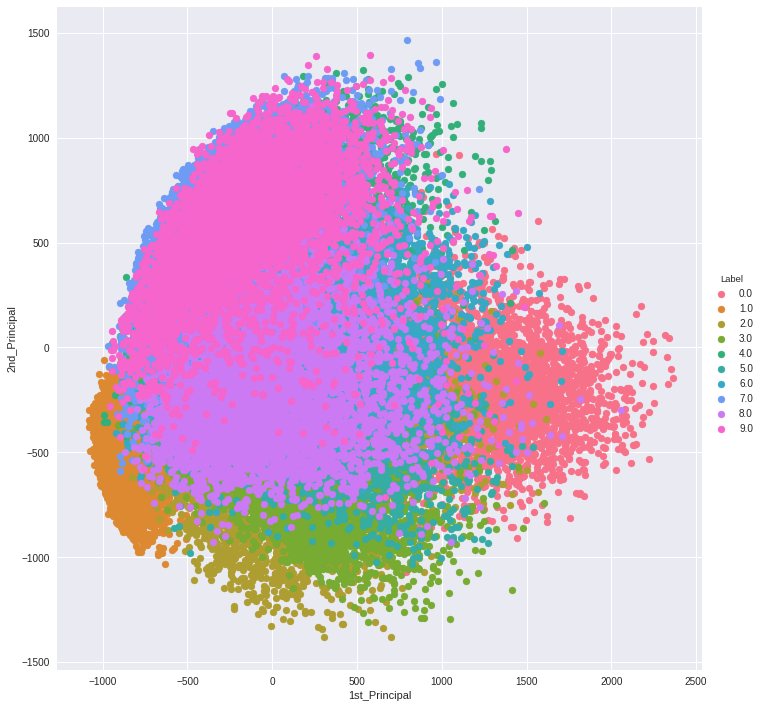

In [29]:
#Visualize the MNIST train dataset in 2D using PCA.
import pandas as pd
import seaborn as sn

#Initialize the PCA
from sklearn import decomposition
pca = decomposition.PCA()

#Configure the parameteres: Number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(X_train)

#pca_data will contain the 2-D projections of X_train
print("Shape of the Data Matrix before reducing dimension: ",X_train.shape)
print("Shape of the Data Matrix after reducing dimension: ",pca_data.shape)

#Attaching the label for each 2D data point. 
pca_data = np.vstack((pca_data.T, y_train)).T

#Creating a new dataframe which help us in ploting the result data. The new dataframe contains the reduced dimension of X_train along with the class label.
pca_df = pd.DataFrame(data=pca_data, columns=("1st_Principal", "2nd_Principal", "Label"))
sn.FacetGrid(pca_df, hue="Label", size=10).map(plt.scatter, '1st_Principal', '2nd_Principal').add_legend()
plt.show()

<h3>2D Visualization of the MNIST train dataset using t-SNE.</h3>

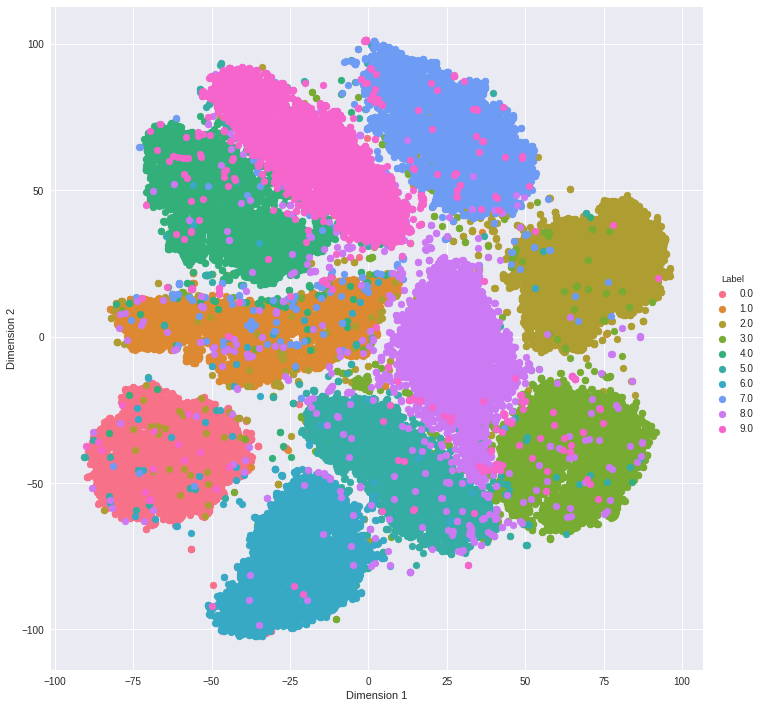

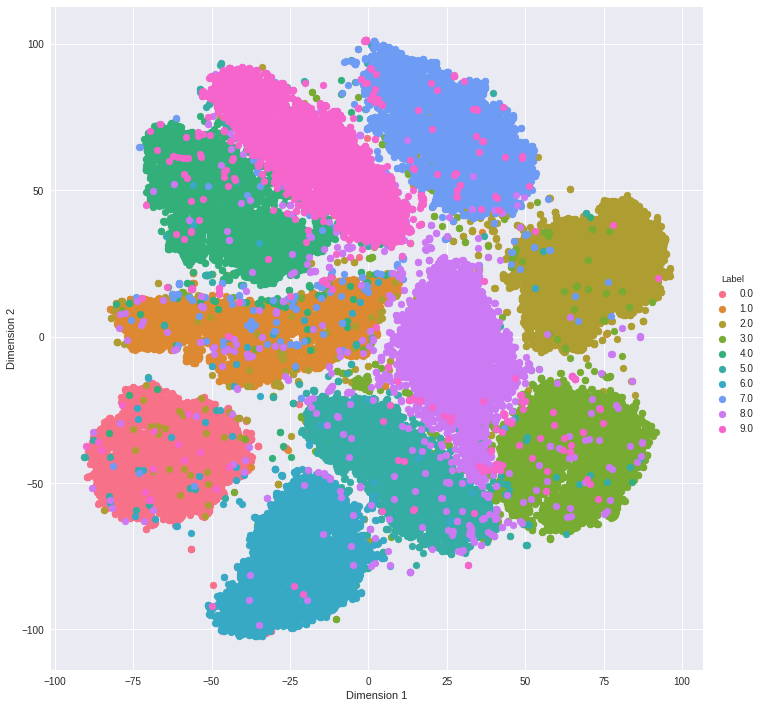

In [30]:
#Visualize the MNIST train dataset in 2D using t-SNE.
import seaborn as sn

#Initialize the t-SNE. Configure the parameteres: Number of components = 2
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200, n_iter=2000, metric='euclidean', random_state=0)
tsne_data = tsne.fit_transform(X_train)

#Creating a new dataframe which help us in ploting the result data. The new dataframe contains the reduced dimension of X_train along with the class label.
tsne_data = np.vstack((tsne_data.T, y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dimension 1", "Dimension 2", "Label"))

#Ploting the result of tsne reduction
sn.FacetGrid(tsne_df, hue="Label", size=10).map(plt.scatter, 'Dimension 1', 'Dimension 2').add_legend()
plt.show()

<h3>Data Processing Section.</h3>

In [0]:
from __future__ import print_function
import keras
from keras import backend as K

num_of_categories = 10

#Input image dimensions
img_rows, img_cols = 28, 28

#Resizing the flattened 784 dimension input back to 28X28 matrix representation before applying the CNN.
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [32]:
#Normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

#Print the dimensions of the train and test data.
print('X_train shape:', X_train.shape)
print('X_train shape:', X_test.shape)

print("\nNumber of training samples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training samples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

X_train shape: (60000, 28, 28, 1)
X_train shape: (10000, 28, 28, 1)

Number of training samples : 60000 and each image is of shape (28, 28)
Number of training samples : 10000 and each image is of shape (28, 28)


<h3>Encoding the class variables.</h3>

In [33]:
#Here we are having a class number for each image. We will convert each of these class numbers to binary vectors.
print("Before converting the class labels into binary vectors..")
print("Class label of first image :", y_train[0])
print("Class label of second image :", y_train[1])
print("Class label of third image :", y_train[2])

#Let's convert class numbers into a 10 dimensional vector. Example: Consider an image is 5. We will convert 5 into => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]. Similarly 3 into => [0, 0, 0, 3, 0, 0, 0, 0, 0, 0]
#This process can also be done using the OneHotEncoding tool in scikit learn.

#Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_of_categories)
y_test = keras.utils.to_categorical(y_test, num_of_categories)

print("\nAfter converting the class labels into binary vectors..")
print("Class label of first image :", y_train[0])
print("Class label of second image :", y_train[1])
print("Class label of third image :", y_train[2])

Before converting the class labels into binary vectors..
Class label of first image : 5
Class label of second image : 0
Class label of third image : 4

After converting the class labels into binary vectors..
Class label of first image : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Class label of second image : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Class label of third image : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


<h3>CNN Architecture 1: 3 CNN Layers each of 3X3 kernels.</h3>

In [34]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Convolution2D
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras import optimizers
import warnings
warnings.filterwarnings("ignore")

output_dim=10
batch_size = 128 
nb_epoch = 50

#Initialize model
model = Sequential()

#CNN Layer 1
#input: 28X28 images with 1 channel -> (28X28X1) tensors.
#this applies 64 convolution filters of size 3X3 each.
model.add(ZeroPadding2D((1,1), input_shape=input_shape))
model.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.4))

#CNN Layer 2
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Dropout(0.4))

#CNN Layer 3
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Dropout(0.4))

#Flatten the output before feeding these to the fully connected Neurons                                    
model.add(Flatten())

#Fully connected Layers
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax', kernel_initializer='he_normal'))

#Using adam as our optimzer
adam=optimizers.Adam(lr=0.001, decay=1e-6, beta_1=0.9, beta_2=0.999, epsilon=0.000001, amsgrad=False)

#Get a summary of the model.
print(model.summary())

#Compile the model
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

#Run the model.
history=model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_4 (ZeroPaddin (None, 30, 30, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
dropout_6 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
zero_padding2d_5 (ZeroPaddin (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 64)        0         
__________

Test score (Validation Loss): 0.06518982120435685
Test accuracy (Accuracy on Unseen Data): 0.9804


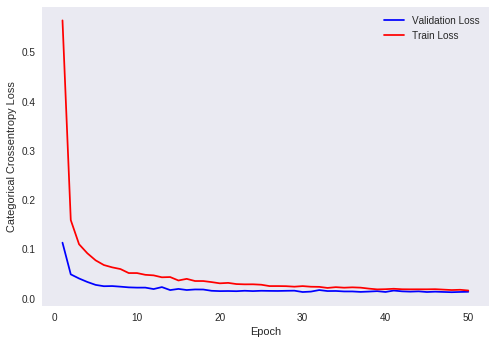

In [38]:
#Plot the train and test loss vs number of epochs
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score (Validation Loss):', score[0]) 
print('Test accuracy (Accuracy on Unseen Data):', score[1])

#Plot train vs test loss
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

#List of epoch numbers
x = list(range(1,nb_epoch+1))

#Display the model
val_loss = history.history['val_loss'] #Validation Loss
loss = history.history['loss'] #Training Loss
plt_dynamic_loss(x, val_loss, loss, ax)

In [0]:
#Save the model.
from keras.models import load_model
model.save('/content/drive/My Drive/weights_cnn/mnist_model_3cnn.h5') #Load using: model = load_model('cnn_mnist_baseline.h5')

#Save scores to a file using pickle.
acc_scores=[]
cnn_scores=[]

scores= [history.history['val_loss'][-1],history.history['val_acc'][-1],history.history['loss'][-1],history.history['acc'][-1]]
scores = ["CNN-1: 3 Layers"] + scores
cnn_scores.append(scores)

test_accuracy=history.history['val_acc']
test_accuracy = ["CNN-1: 3 Layers"] + test_accuracy
acc_scores.append(test_accuracy)

import pickle
with open('/content/drive/My Drive/weights_cnn/cnn_scores_3cnn.pkl', 'wb') as f:
  pickle.dump(cnn_scores, f)
  
with open('/content/drive/My Drive/weights_cnn/acc_scores_3cnn.pkl', 'wb') as f:
  pickle.dump(acc_scores, f)
  
#Save model information in a list for later use
model_data=[]
model_arch='3 CNN Layers each of 3X3 kernels'

scores_history=[np.round(history.history['loss'][-1],4), np.round(history.history['acc'][-1],4), np.round(history.history['val_loss'][-1],4), np.round(history.history['val_acc'][-1],4)]
model_data.append([model_arch]+scores_history)

<h3>CNN Architecture 2 : 5 CNN Layers.</h3>

In [41]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Convolution2D
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras import optimizers
import warnings
warnings.filterwarnings("ignore")

output_dim=10
batch_size = 128 
nb_epoch = 50

#Initialize model
model = Sequential()

#CNN Layer 1
#input: 28X28 images with 1 channel -> (28X28X1) tensors.
#this applies 64 convolution filters of size 5x5 each.
model.add(ZeroPadding2D((1,1), input_shape=input_shape))
model.add(Convolution2D(filters=64, kernel_size=(5,5), activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.4))

#CNN Layer 2
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(filters=64, kernel_size=(5,5), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Dropout(0.4))

#CNN Layer 3
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(filters=64, kernel_size=(5,5), activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.4))

#CNN Layer 4
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(filters=64, kernel_size=(5,5), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

#CNN Layer 5
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(filters=32, kernel_size=(5,5), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(Dropout(0.4))

#Flatten the output before feeding these to the fully connected Neurons                                    
model.add(Flatten())

#Fully connected Layers
model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax', kernel_initializer='he_normal'))

#Using adam as our optimzer
adam=optimizers.Adam(lr=0.001, decay=1e-6, beta_1=0.9, beta_2=0.999, epsilon=0.000001, amsgrad=False)

#Get a summary of the model.
print(model.summary())

#Compile the model
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

#Run the model.
history=model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_17 (ZeroPaddi (None, 30, 30, 1)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 26, 26, 64)        1664      
_________________________________________________________________
dropout_27 (Dropout)         (None, 26, 26, 64)        0         
_________________________________________________________________
zero_padding2d_18 (ZeroPaddi (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 64)        102464    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 12, 12, 64)        0         
__________

Test score (Validation Loss): 0.022026520042167975
Test accuracy (Accuracy on Unseen Data): 0.9942


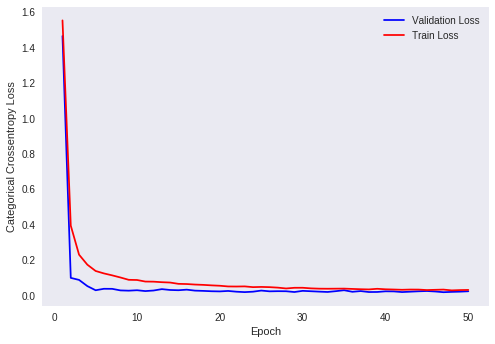

In [42]:
#Plot the train and test loss vs number of epochs
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score (Validation Loss):', score[0]) 
print('Test accuracy (Accuracy on Unseen Data):', score[1])

#Plot train vs test loss
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

#List of epoch numbers
x = list(range(1,nb_epoch+1))

#Display the model
val_loss = history.history['val_loss'] #Validation Loss
loss = history.history['loss'] #Training Loss
plt_dynamic_loss(x, val_loss, loss, ax)

In [0]:
#Save the model.
from keras.models import load_model
model.save('/content/drive/My Drive/weights_cnn/mnist_model_5cnn.h5') #Load using: model = load_model('cnn_mnist_baseline.h5')

#Save scores to a file using pickle.
acc_scores=[]
cnn_scores=[]

scores= [history.history['val_loss'][-1],history.history['val_acc'][-1],history.history['loss'][-1],history.history['acc'][-1]]
scores = ["CNN-2: 5 Layers"] + scores
cnn_scores.append(scores)

test_accuracy=history.history['val_acc']
test_accuracy = ["CNN-2: 5 Layers"] + test_accuracy
acc_scores.append(test_accuracy)

import pickle
with open('/content/drive/My Drive/weights_cnn/cnn_scores_5cnn.pkl', 'wb') as f:
  pickle.dump(cnn_scores, f)
  
with open('/content/drive/My Drive/weights_cnn/acc_scores_5cnn.pkl', 'wb') as f:
  pickle.dump(acc_scores, f)
  
#Save model information in a list for later use
model_arch='5 CNN Layers each of 5X5 kernels'

scores_history=[np.round(history.history['loss'][-1],4), np.round(history.history['acc'][-1],4), np.round(history.history['val_loss'][-1],4), np.round(history.history['val_acc'][-1],4)]
model_data.append([model_arch]+scores_history)

<h3>CNN Architecture 3 : 7 CNN Layers.</h3>

In [44]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Convolution2D
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras import optimizers, regularizers
import warnings
warnings.filterwarnings("ignore")

output_dim=10
batch_size = 256
nb_epoch = 100

#Initialize model
model = Sequential()

#CNN Layer 1
#input: 28X28 images with 1 channel -> (28X28X1) tensors.
#this applies 64 convolution filters of size 5x5 each.
model.add(ZeroPadding2D((1,1), input_shape=input_shape))
model.add(Convolution2D(filters=64, kernel_size=(5,5), activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.4))

#CNN Layer 2
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

#CNN Layer 3
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

#CNN Layer 4
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(filters=64, kernel_size=(2,2), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

#CNN Layer 5
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(filters=32, kernel_size=(2,2), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

#CNN Layer 6
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(filters=32, kernel_size=(2,2), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

#CNN Layer 7
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(filters=32, kernel_size=(2,2), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

#Flatten the output before feeding these to the fully connected Neurons                                    
model.add(Flatten())

#Fully connected Layers
model.add(Dense(2048, activation='relu', kernel_initializer='he_normal', )) 
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1024, activation='relu', kernel_initializer='he_normal', ))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1024, activation='relu', kernel_initializer='he_normal', ))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu', kernel_initializer='he_normal', ))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu', kernel_initializer='he_normal', ))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax', kernel_initializer='he_normal', kernel_regularizer=regularizers.l1(0.001))) #L1 regularization to reduce sparsity + prevent overfitting

#Using adam as our optimzer
adam=optimizers.Adam(lr=0.005, decay=1e-6, beta_1=0.9, beta_2=0.99, epsilon=0.000001, amsgrad=True) #READ:https://openreview.net/forum?id=ryQu7f-RZ

'''
Adam: 
Mean: First Order moment. 
Variance: 2nd Order moment.

m_t= (beta1)*m_t-1+(1-beta1)(g_t)**1
v_t= (beta1)*v_t-1+(1-beta2)(g_t)**2

m_t_hat=m_t/[1-(beta1)**2]
v_t_hat=v_t/[1-(beta2)**2]

w_t=w_t-1-(alpha)*[m_t_hat/(sqrt(v_t_hat)+epsilon)]

typically, beta1=0.9, beta2=0.99

'''

#Get a summary of the model.
print(model.summary())

#Compile the model
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

#Run the model.
history=model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_22 (ZeroPaddi (None, 30, 30, 1)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 26, 26, 64)        1664      
_________________________________________________________________
dropout_35 (Dropout)         (None, 26, 26, 64)        0         
_________________________________________________________________
zero_padding2d_23 (ZeroPaddi (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 13, 13, 64)        256       
__________

Test score (Validation Loss): 0.057966713908314704
Test accuracy (Accuracy on Unseen Data): 0.9932


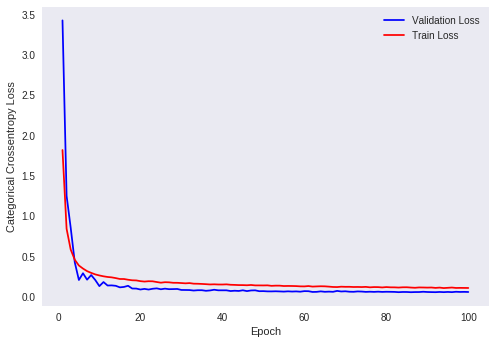

In [45]:
#Plot the train and test loss vs number of epochs
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score (Validation Loss):', score[0]) 
print('Test accuracy (Accuracy on Unseen Data):', score[1])

#Plot train vs test loss
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

#List of epoch numbers
x = list(range(1,nb_epoch+1))

#Display the model
val_loss = history.history['val_loss'] #Validation Loss
loss = history.history['loss'] #Training Loss
plt_dynamic_loss(x, val_loss, loss, ax)

In [0]:
#Save the model.
from keras.models import load_model
model.save('/content/drive/My Drive/weights_cnn/mnist_model_7cnn.h5') #Load using: model = load_model('cnn_mnist_baseline.h5')

#Save scores to a file using pickle.
acc_scores=[]
cnn_scores=[]

scores= [history.history['val_loss'][-1],history.history['val_acc'][-1],history.history['loss'][-1],history.history['acc'][-1]]
scores = ["CNN-3: 7 Layers"] + scores
cnn_scores.append(scores)

test_accuracy=history.history['val_acc']
test_accuracy = ["CNN-3: 7 Layers"] + test_accuracy
acc_scores.append(test_accuracy)

import pickle
with open('/content/drive/My Drive/weights_cnn/cnn_scores_7cnn.pkl', 'wb') as f:
  pickle.dump(cnn_scores, f)
  
with open('/content/drive/My Drive/weights_cnn/acc_scores_7cnn.pkl', 'wb') as f:
  pickle.dump(acc_scores, f)
  
#Save model information in a list for later use
model_arch='7 CNN Layers each of mixed kernels'

scores_history=[np.round(history.history['loss'][-1],4), np.round(history.history['acc'][-1],4), np.round(history.history['val_loss'][-1],4), np.round(history.history['val_acc'][-1],4)]
model_data.append([model_arch]+scores_history)

In [0]:
import pickle

acc_scores3 = pickle.load(open( "/content/drive/My Drive/weights_cnn/acc_scores_3cnn.pkl", "rb" ))[0]
acc_scores5 = pickle.load(open( "/content/drive/My Drive/weights_cnn/acc_scores_5cnn.pkl", "rb" ))[0]
acc_scores7 = pickle.load(open( "/content/drive/My Drive/weights_cnn/acc_scores_7cnn.pkl", "rb" ))[0]

acc_scores3.pop(0)
acc_scores5.pop(0)
acc_scores7.pop(0)
acc_scores7=acc_scores7[0:50]

acc_scores = [acc_scores3,acc_scores5,acc_scores7]

<h3>Comparison b/w accuracy of different models in 1-50 epochs.</h3>

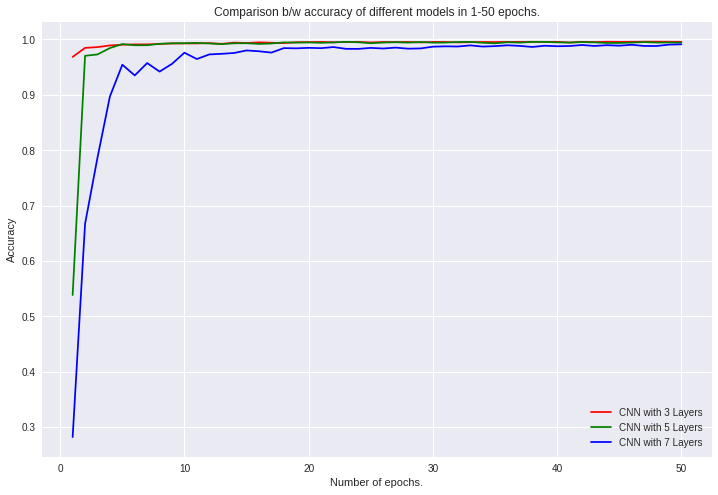

In [48]:
import matplotlib.pyplot as plt

#List of epoch numbers
x_axes = list(range(1,51))
labels = ["CNN with 3 Layers", "CNN with 5 Layers", "CNN with 7 Layers"]

#Plot the accuracy scores using a line chart.
color_map = ['red','g','blue']
plt.figure(figsize=(12,8))
for index in range(0,len(labels)):
    plt.plot(x_axes, acc_scores[index], color=color_map[index], label=labels[index])
plt.xlabel('Number of epochs.')
plt.ylabel('Accuracy')
plt.title("Comparison b/w accuracy of different models in 1-50 epochs.")
plt.legend()
plt.show()

### Model Summary.

In [49]:
import pandas as pd
model_info=pd.DataFrame(model_data,columns=['Model Architecture', 'Train Loss', 'Train Accuracy', 'Test Loss', 'Test Accuracy'])
model_info.to_csv('model_info_loss_data_cnn.csv')

model_info

,Model Architecture,Train Loss,Train Accuracy,Test Loss,Test Accuracy
0,3 CNN Layers each of 3X3 kernels,0.0160,0.9951,0.0134,0.9958
1,5 CNN Layers each of 5X5 kernels,0.0297,0.9922,0.0220,0.9942
2,7 CNN Layers each of mixed kernels,0.1077,0.9802,0.0580,0.9932
